## 精准度-召回率曲线

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# decision_score的最小值和最大值之间取各种threshold,步长0.1
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

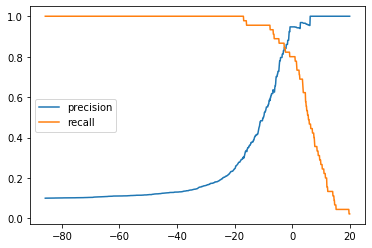

In [20]:
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.legend()
plt.show()

### Precision-Recall 曲线
横轴precision，纵轴recall

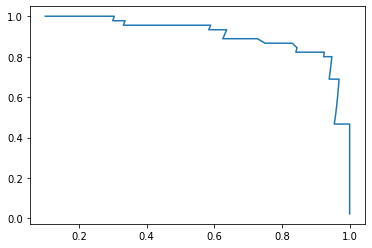

In [7]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn中的Precision-Recall曲线

In [8]:
# sklearn中有precision-recall曲线
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)
# sklearn会自动定义步长
# sklearn中会去掉一部分数据，只取比较重要的数据

In [9]:
precisions.shape

(149,)

In [10]:
recalls.shape

(149,)

In [11]:
thresholds.shape
# 最后一个的精确率为1，召回率为0，此时threshold不存在，所以threshold的shape会比precision和recall小1，sklearn定义

(148,)

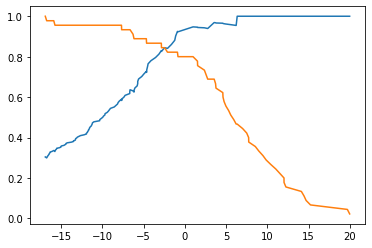

In [12]:
# 需要抛去最后一个值
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

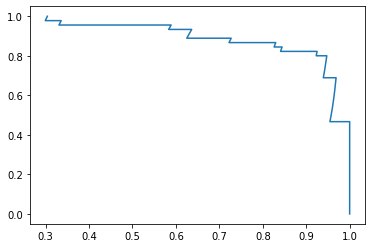

In [13]:
plt.plot(precisions, recalls)
plt.show()